In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('ADANIPORTS.csv')  # Replace with your filename
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Close
Date,
2007-11-27,962.90
2007-11-28,893.90
2007-11-29,884.20
2007-11-30,921.55
2007-12-03,969.30


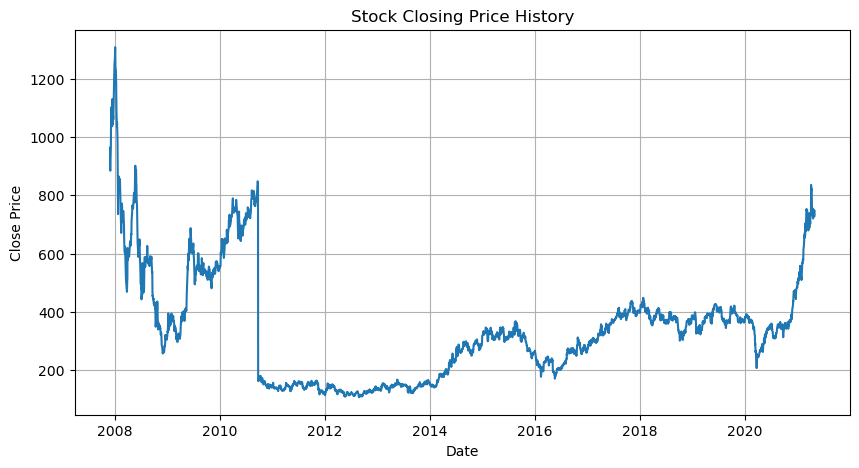

In [4]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title('Stock Closing Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [5]:
# Predict 5 days into the future
future_days = 5
df['Prediction'] = df['Close'].shift(-future_days)

# Features (X) and Labels (y)
X = np.array(df[['Close']][:-future_days])
y = np.array(df['Prediction'][:-future_days])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)


In [7]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error:", round(mae, 2))
print("Root Mean Squared Error:", round(rmse, 2))
print("R² Score:", round(r2, 2))


Mean Absolute Error: 19.0
Root Mean Squared Error: 48.36
R² Score: 0.94


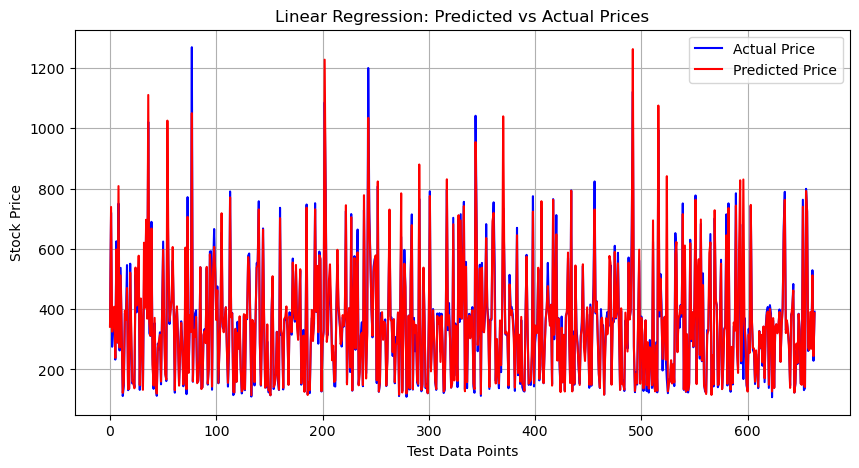

In [8]:
plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title('Linear Regression: Predicted vs Actual Prices')
plt.xlabel('Test Data Points')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Predict future days (next 5 days from the last available point)
future_X = np.array(df[['Close']][-future_days:])
future_predictions = model.predict(future_X)

print("Predicted prices for the next", future_days, "days:")
for i, price in enumerate(future_predictions, 1):
    print(f"Day {i}: ₹{price:.2f}")


Predicted prices for the next 5 days:
Day 1: ₹725.42
Day 2: ₹743.55
Day 3: ₹740.69
Day 4: ₹741.18
Day 5: ₹724.73
